<a href="https://colab.research.google.com/github/kevinsimarmata/kevinsimarmata/blob/main/Final_Project_Tim_Slovin_Source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Preprocessing**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
df = pd.read_csv('Invistico_Airline.csv')

In [ ]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118731 entries, 0 to 118730
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       118731 non-null  object 
 1   Gender                             118731 non-null  object 
 2   Customer Type                      118731 non-null  object 
 3   Age                                118731 non-null  int64  
 4   Type of Travel                     118731 non-null  object 
 5   Class                              118730 non-null  object 
 6   Flight Distance                    118730 non-null  float64
 7   Seat comfort                       118730 non-null  float64
 8   Departure/Arrival time convenient  118730 non-null  float64
 9   Food and drink                     118730 non-null  float64
 10  Gate location                      118730 non-null  float64
 11  Inflight wifi service              1187

Membagi feature menjadi cats dan nums

In [ ]:
cats = ['Gender', 'Customer Type','Type of Travel', 'Class']
nums = ['Age','Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes']

Melihat persebaran data cats dan nums

In [ ]:
df[cats].describe()

,Gender,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880
unique,2,2,2,3
top,Female,Loyal Customer,Business travel,Business
freq,65899,106100,89693,62160



Highlight
*   Pada kolom class terlihat persebarannya tidak merata karena lebih dari setengahnya adlaah customer economy



In [ ]:
df[nums].describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,118731.000000,118730.000000,118730.000000,118730.000000,118730.000000,118730.000000,118730.00000,118730.000000,118730.000000,118730.000000,118730.000000,118730.000000,118730.000000,118730.000000,118730.000000,118730.000000,118730.000000,118373.000000
mean,39.003436,1973.482473,2.792470,2.989228,2.833892,2.988815,3.19354,3.292344,3.439249,3.336739,3.369216,3.394483,3.614150,3.308903,3.625587,3.280738,14.826767,15.230889
std,15.367272,1007.517264,1.375718,1.537393,1.447227,1.296786,1.31087,1.339374,1.304825,1.276964,1.246362,1.271082,1.136653,1.263520,1.133144,1.294229,38.072269,38.460257
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,1374.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,39.000000,1919.000000,3.000000,3.000000,3.000000,3.000000,3.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,2516.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Highlight

Positively Skewed terlihat pada kolom
*   Departure Delay in Minutes
*   Arrival Delay in Minutes






**Missing Value**

In [ ]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

Menghapus data yang null, karena jumlahnya hanya sedikit

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

**Pengecekan Duplicate**

In [ ]:
df.duplicated().sum()

0

**Mengelola outliers menggunakan Z-Score**

Checking outliers suspect

In [ ]:
df[nums].columns

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

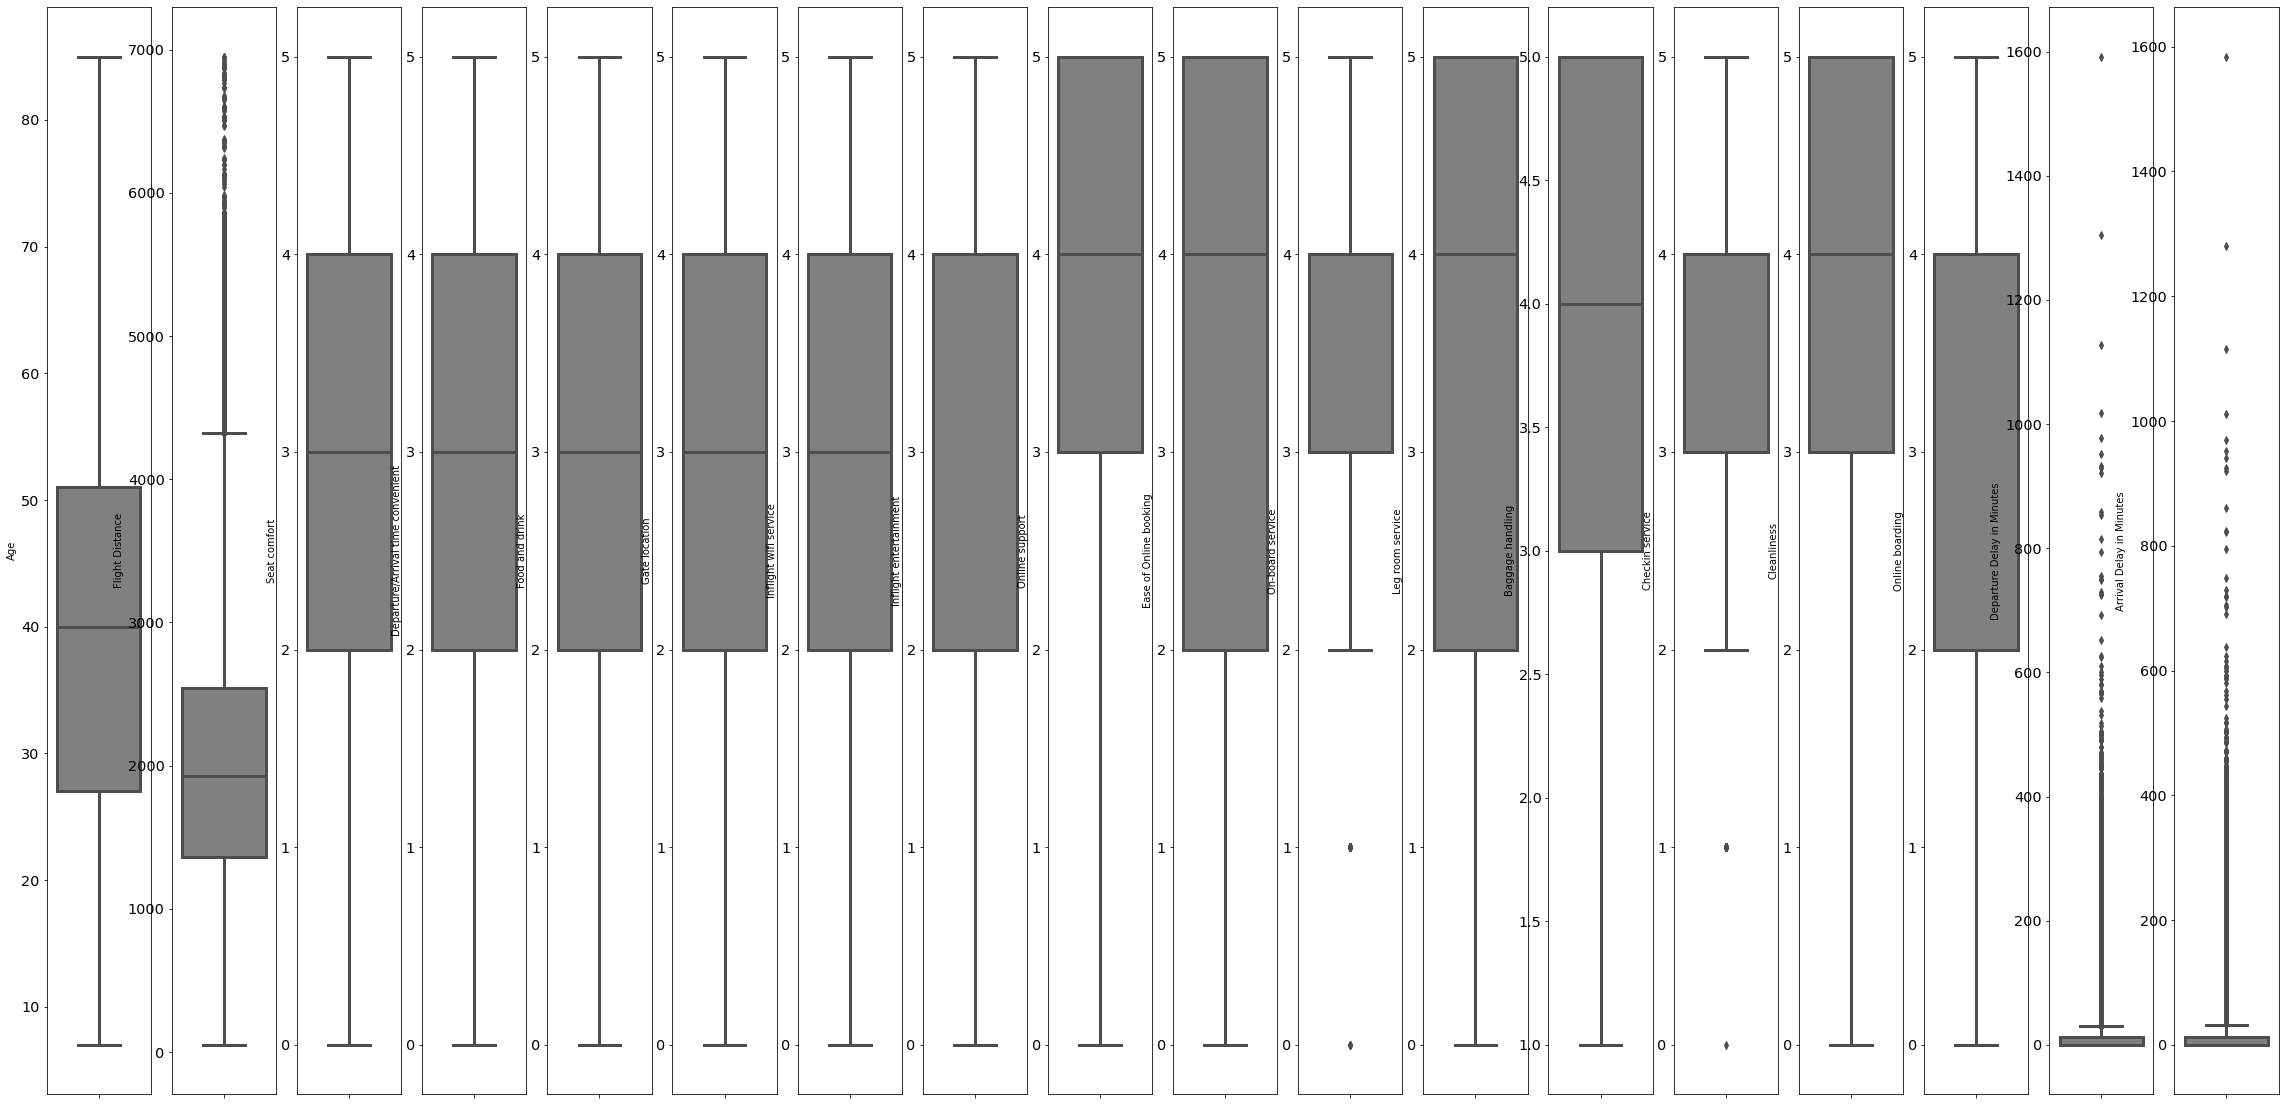

In [ ]:
plt.figure(figsize=(40,20))
for i in range(0, len(nums)):
  plt.subplot(1, len(nums),i+1)
  sns.boxplot(y=df[nums[i]], color='gray',orient='v')

Outliers are in Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes

In [ ]:
from scipy import stats 

In [ ]:
print(f'Jumlah baris sebelum memfilter outliers:{len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']:
  zscore = abs(stats.zscore(df[col]))
  filtered_entries = (zscore<3) & filtered_entries

df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outliers:{len(df)}')

Jumlah baris sebelum memfilter outliers:129487
Jumlah baris setelah memfilter outliers:125800


**Normalization and Standarization**

**Standarization** = Age, Flight Distance, Seat comfort, Departure/Arrival, Food and drink, gate locations, inflight wifi service, inflight entertainment, online support, ease of online booking, on-board service, leg room service, baggage handling, checkin service, cleanliness, online boardingv <br>
**Normalization** = Departure Delay in Minutes, Arrival Delay in Minutes.

In [ ]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
df['DepartureDelay_inMinutes_norm'] = MinMaxScaler().fit_transform(df['Departure Delay in Minutes'].values.reshape(len(df),1))
df['ArrivalDelay_inMinutes_norm'] = MinMaxScaler().fit_transform(df['Arrival Delay in Minutes'].values.reshape(len(df),1))
df['Age_std'] = StandardScaler().fit_transform(df['Age'].values.reshape(len(df),1))
df['FlightDistance_std'] = StandardScaler().fit_transform(df['Flight Distance'].values.reshape(len(df),1))

In [ ]:
df = df.drop(columns=['Departure Delay in Minutes','Arrival Delay in Minutes','Age','Flight Distance']).copy()

In [ ]:
cats = ['Gender', 'Customer Type','Type of Travel', 'Class']
nums = ['Age_std','FlightDistance_std', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'DepartureDelay_inMinutes_norm', 'ArrivalDelay_inMinutes_norm']

**Feature Encoding**

In [ ]:
for cat in cats:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [ ]:
df.sample(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
72299,satisfied,Male,Loyal Customer,59,Business travel,Eco Plus,1505,2,5,2,5,2,2,2,2,2,1,1,4,3,2,0,0.0,0,1,1,0,1,0,0,0,1
123357,satisfied,Male,Loyal Customer,36,Business travel,Business,432,5,5,5,5,3,1,3,5,5,5,5,5,5,1,0,0.0,0,1,1,0,1,0,1,0,0
100086,satisfied,Female,Loyal Customer,24,Business travel,Business,5328,5,5,5,5,4,4,4,4,3,2,4,4,4,4,0,0.0,1,0,1,0,1,0,1,0,0
54423,dissatisfied,Female,disloyal Customer,59,Business travel,Business,2218,3,3,3,4,1,3,1,1,4,2,5,3,5,1,34,37.0,1,0,0,1,1,0,1,0,0
97869,satisfied,Female,Loyal Customer,60,Business travel,Business,1243,4,4,4,4,2,4,5,4,4,4,4,5,4,3,0,3.0,1,0,1,0,1,0,1,0,0


In [ ]:
df = df.drop(columns=cats).copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  int64  
 1   Age                                129487 non-null  int64  
 2   Flight Distance                    129487 non-null  int64  
 3   Seat comfort                       129487 non-null  int64  
 4   Departure/Arrival time convenient  129487 non-null  int64  
 5   Food and drink                     129487 non-null  int64  
 6   Gate location                      129487 non-null  int64  
 7   Inflight wifi service              129487 non-null  int64  
 8   Inflight entertainment             129487 non-null  int64  
 9   Online support                     129487 non-null  int64  
 10  Ease of Online booking             129487 non-null  int64  
 11  On-board service                   1294

Class Imbalance

In [ ]:
df['satisfaction_class'] = df['satisfaction'] == 'satisfied'
df['satisfaction_class'].value_counts()

True     69379
False    56421
Name: satisfaction_class, dtype: int64

Satisfaction dengan value satisfied diganti dengan 0 <br>
dan value disssatisfied diganti dengan 1 <br>
Mengapa demikian, karena kami ingin mencari customer yang disssatisfied

In [ ]:
df['satisfaction'] = df['satisfaction'].replace(['satisfied'], 0)

In [ ]:
df['satisfaction'] = df['satisfaction'].replace(['dissatisfied'], 1)

In [ ]:
df.sample(10)

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
104347,0,35,2155,3,3,3,3,3,4,1,4,4,4,4,5,4,2,0,0.0,1,0,1,0,1,0,1,0,0
47840,1,28,2064,2,2,2,3,2,2,2,2,4,1,4,1,3,2,43,36.0,0,1,0,1,1,0,0,1,0
104977,0,43,2779,4,4,4,4,4,4,4,4,3,1,2,1,2,4,0,0.0,0,1,1,0,1,0,0,1,0
66368,1,41,2215,1,5,5,5,1,1,1,1,2,4,2,4,2,1,0,13.0,0,1,1,0,1,0,0,1,0
68612,1,42,2860,1,1,1,1,1,1,1,1,3,2,4,4,3,1,0,0.0,0,1,1,0,1,0,0,1,0
115857,0,46,505,3,3,3,3,1,1,1,5,5,5,5,1,5,3,25,23.0,0,1,1,0,1,0,1,0,0
9135,1,49,1040,2,1,2,4,4,3,4,4,4,2,2,1,4,1,9,4.0,0,1,1,0,0,1,1,0,0
26483,1,33,1962,3,4,3,3,2,3,2,2,4,2,4,1,1,2,28,42.0,0,1,1,0,0,1,0,1,0
26361,0,18,1396,4,4,4,4,1,5,3,5,5,5,5,4,5,4,4,0.0,1,0,1,0,0,1,0,1,0
12284,1,55,1339,2,4,2,1,4,3,4,1,1,2,1,5,1,5,20,40.0,0,1,1,0,0,1,1,0,0


**EDA**

In [ ]:
df.head()

,satisfaction,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,DepartureDelay_inMinutes_norm,ArrivalDelay_inMinutes_norm,Age_std,FlightDistance_std,Seatcomfort_std,Departure/Arrival_timeconvenient_std,Food_and_drink_std,Gate_location_std,Inflightwifi_service_std,Inflight_entertainment_std,Online_support_std,Ease_of_Online_booking_std,On-board_service_std,Legroom_service_std,Baggage_handling_std,Checkin_service_std,Cleanliness_std,Online_boarding_std,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_class
0,1,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0.0,0.0,1.687255,-1.696804,-2.036745,-1.955495,-1.975354,-0.757499,-0.952257,0.455388,-1.169095,-0.366142,-0.372046,-2.689284,-0.599670,1.316424,-0.626705,-1.043153,1,0,1,0,0,1,0,1,0,True
2,1,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0.0,0.0,-1.620760,0.201017,-2.036745,-1.955495,-1.975354,0.007996,-0.952257,-2.516625,-1.169095,-1.131945,-0.372046,-0.373876,0.263382,0.521830,0.245954,-1.043153,1,0,1,0,0,1,0,1,0,True
3,1,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0.0,0.0,1.356453,-1.334060,-2.036745,-1.955495,-1.975354,0.007996,-0.193323,0.455388,-0.403023,-1.897748,-1.948291,-2.689284,-2.325775,0.521830,-2.372023,-0.272652,1,0,1,0,0,1,0,1,0,True
4,1,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0.0,0.0,2.018056,-1.606624,-2.036745,-1.955495,-1.975354,0.007996,0.565611,-0.287615,0.363050,-1.131945,-1.160169,-2.689284,-1.462722,0.521830,-1.499364,1.268351,1,0,1,0,0,1,0,1,0,True
5,1,0,0,0,3,2,0,2,2,5,4,5,5,4,2,0.0,0.0,-0.628356,-0.046217,-2.036745,-1.955495,-1.975354,0.007996,-0.952257,-2.516625,-1.169095,-1.131945,1.204198,0.397926,1.126434,1.316424,0.245954,-1.043153,0,1,1,0,0,1,0,1,0,True


In [ ]:
df.columns

Index(['satisfaction', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'DepartureDelay_inMinutes_norm', 'ArrivalDelay_inMinutes_norm',
       'Age_std', 'FlightDistance_std', 'Gender_Female', 'Gender_Male',
       'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer',
       'Type of Travel_Business travel', 'Type of Travel_Personal Travel',
       'Class_Business', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

In [ ]:
#cats = ['satisfaction']
nums = ['satisfaction','Age_std','FlightDistance_std', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'DepartureDelay_inMinutes_norm', 'ArrivalDelay_inMinutes_norm','Gender_Female','Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus' ]

In [ ]:
df[nums].describe()

,satisfaction,Age_std,FlightDistance_std,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,DepartureDelay_inMinutes_norm,ArrivalDelay_inMinutes_norm,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
count,125800.000000,1.258000e+05,1.258000e+05,125800.000000,125800.000000,125800.000000,125800.000000,125800.000000,125800.000000,125800.000000,125800.000000,125800.000000,125800.000000,125800.000000,125800.000000,125800.000000,125800.000000,125800.000000,125800.000000,125800.000000,125800.000000,125800.000000,125800.000000,125800.000000,125800.000000,125800.000000,125800.000000,125800.000000
mean,0.551502,-1.321489e-14,-8.326982e-17,2.843092,2.988378,2.854332,2.989555,3.254730,3.387099,3.526089,3.478116,3.472067,3.484420,3.694825,3.343275,3.718156,3.353863,0.080567,0.081952,0.507520,0.492480,0.816010,0.183990,0.689221,0.310779,0.477043,0.450318,0.072639
std,0.497342,1.000004e+00,1.000004e+00,1.395905,1.528202,1.444978,1.306350,1.317643,1.345895,1.305364,1.305825,1.268844,1.295673,1.158683,1.258509,1.145927,1.297861,0.163845,0.163369,0.499945,0.499945,0.387478,0.387478,0.462814,0.462814,0.499475,0.497528,0.259544
min,0.000000,-2.150042e+00,-1.914653e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-8.268365e-01,-6.156642e-01,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.324739e-02,-4.216382e-02,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,7.610107e-01,5.749064e-01,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,0.078125,0.084615,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,3.010461e+00,3.162751e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
for col in cats:
  print(f'''Value count kolom {col}:''')
  print(df[col].value_counts())
  print()

Univariate Analysis

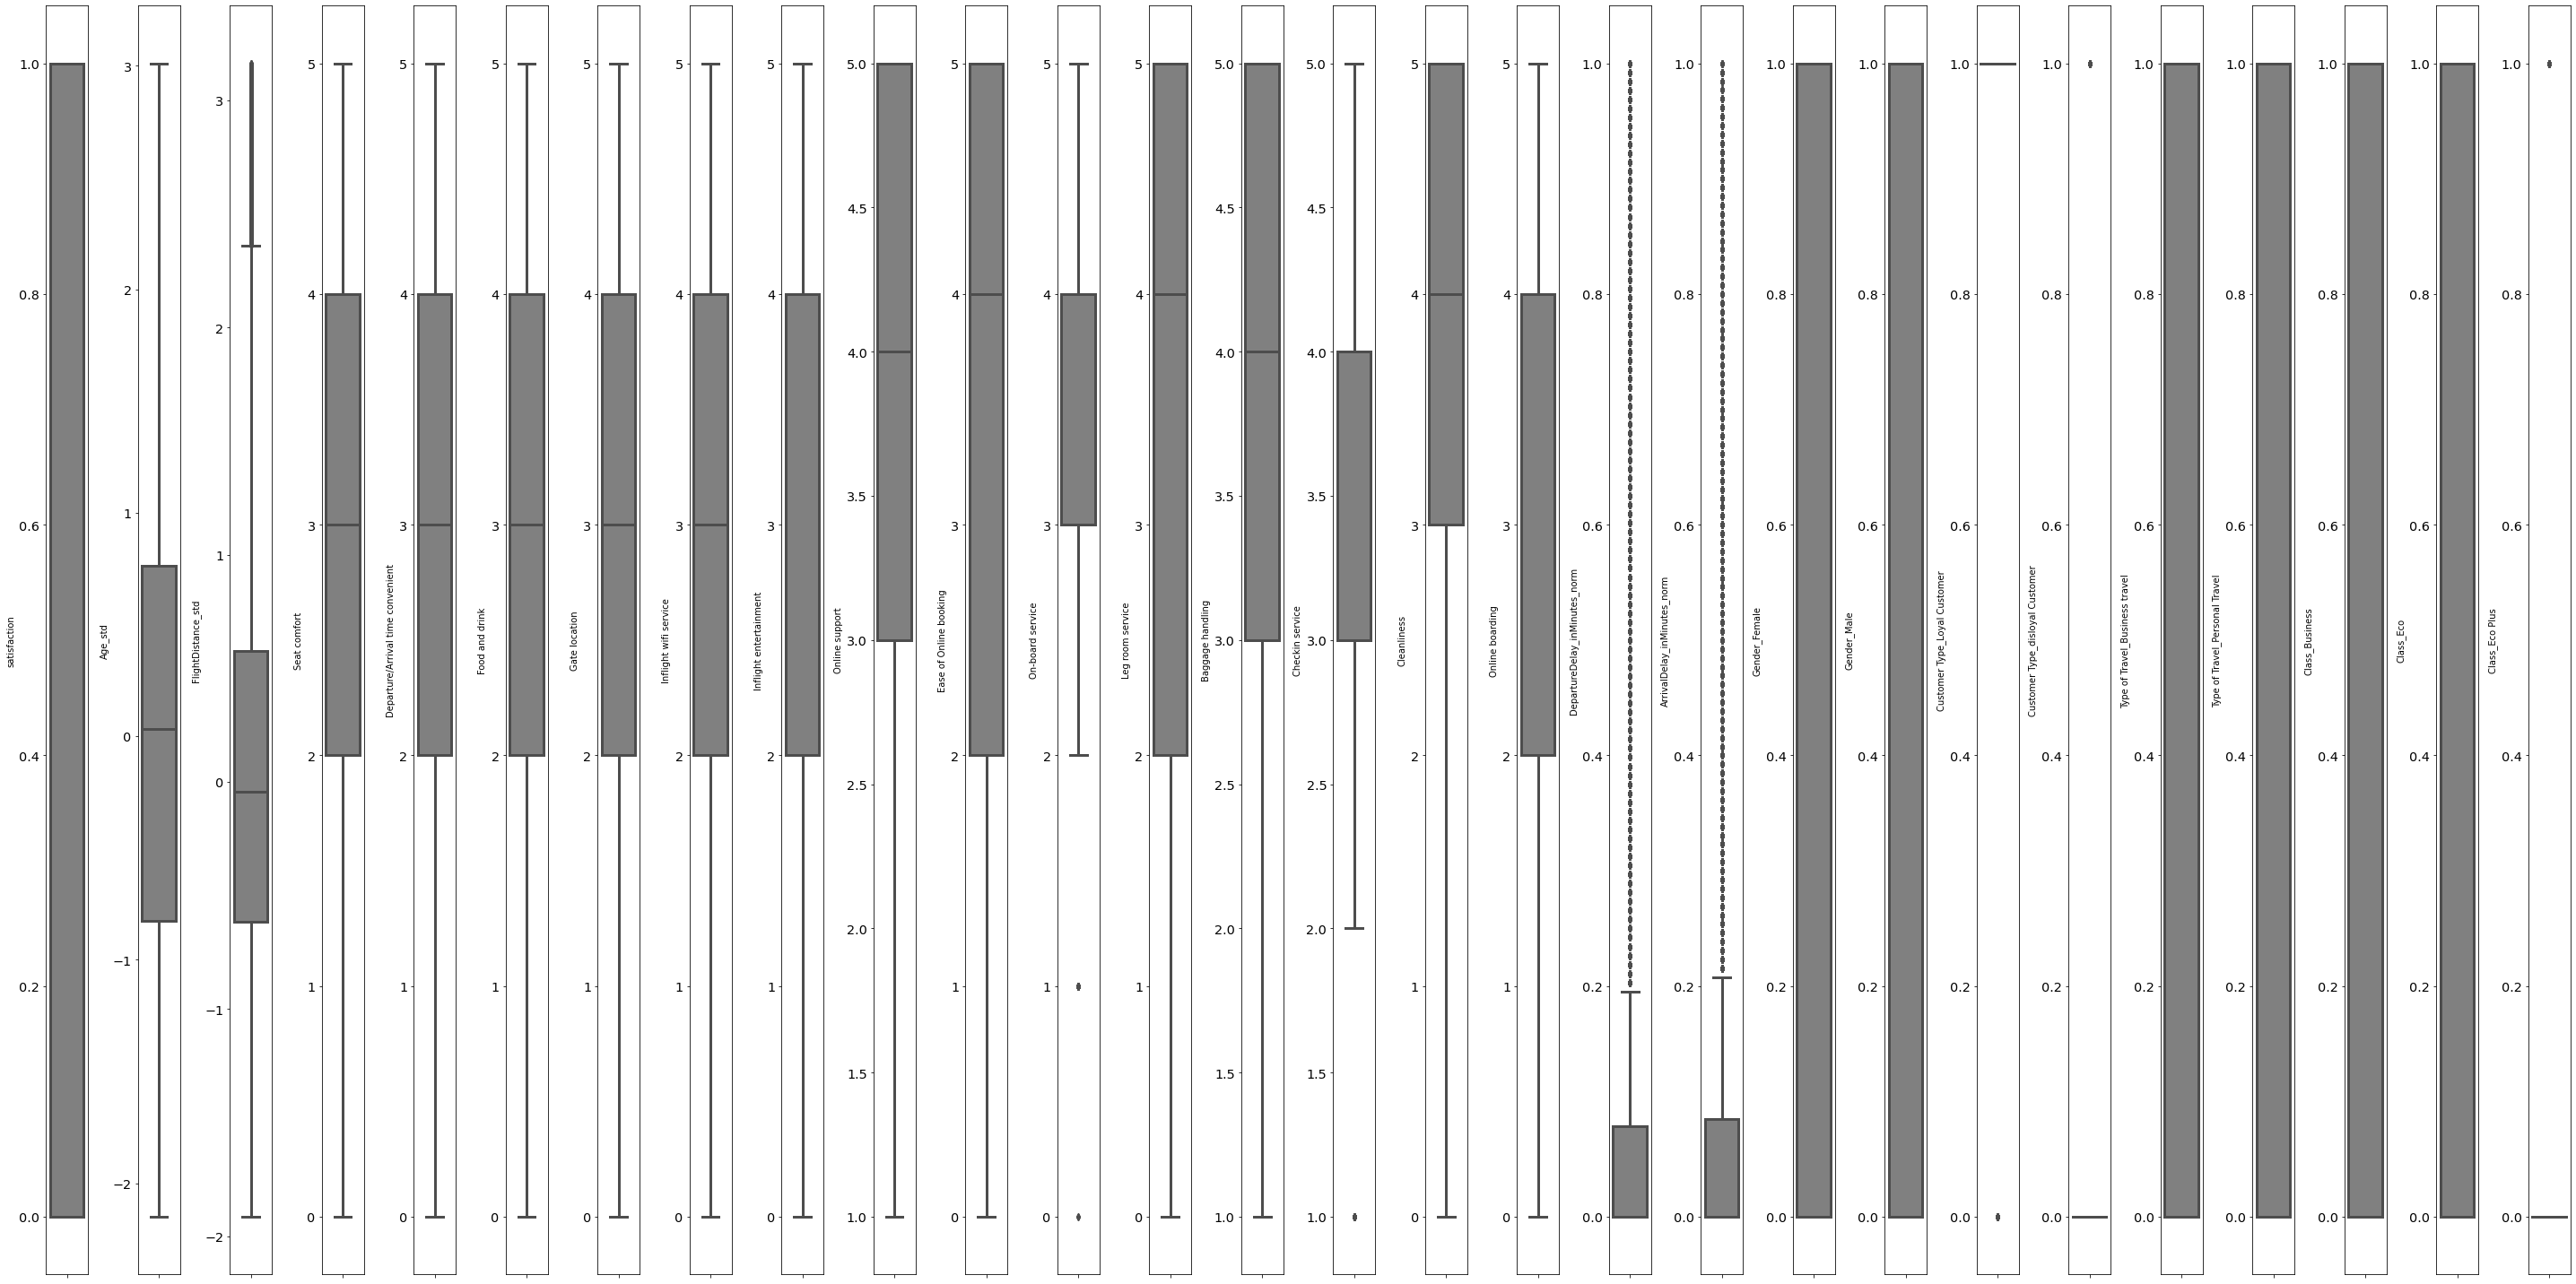

In [ ]:
plt.figure(figsize=(40,20))
for i in range(0,len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.boxplot(y=df[nums[i]],color='gray',orient='v')
  plt.tight_layout()

In [ ]:
plt.figure(figsize=(40, 20))
for i in range(0, len(nums)):
  plt.subplot(2, len(nums)/2, i+1)
  sns.distplot(df[nums[i]],color='gray')
  plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

In [ ]:
plt.figure(figsize=(40, 20))
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(df[cats[i]], color='gray', orient='v')
    plt.tight_layout()

**Bivariate Analysis**

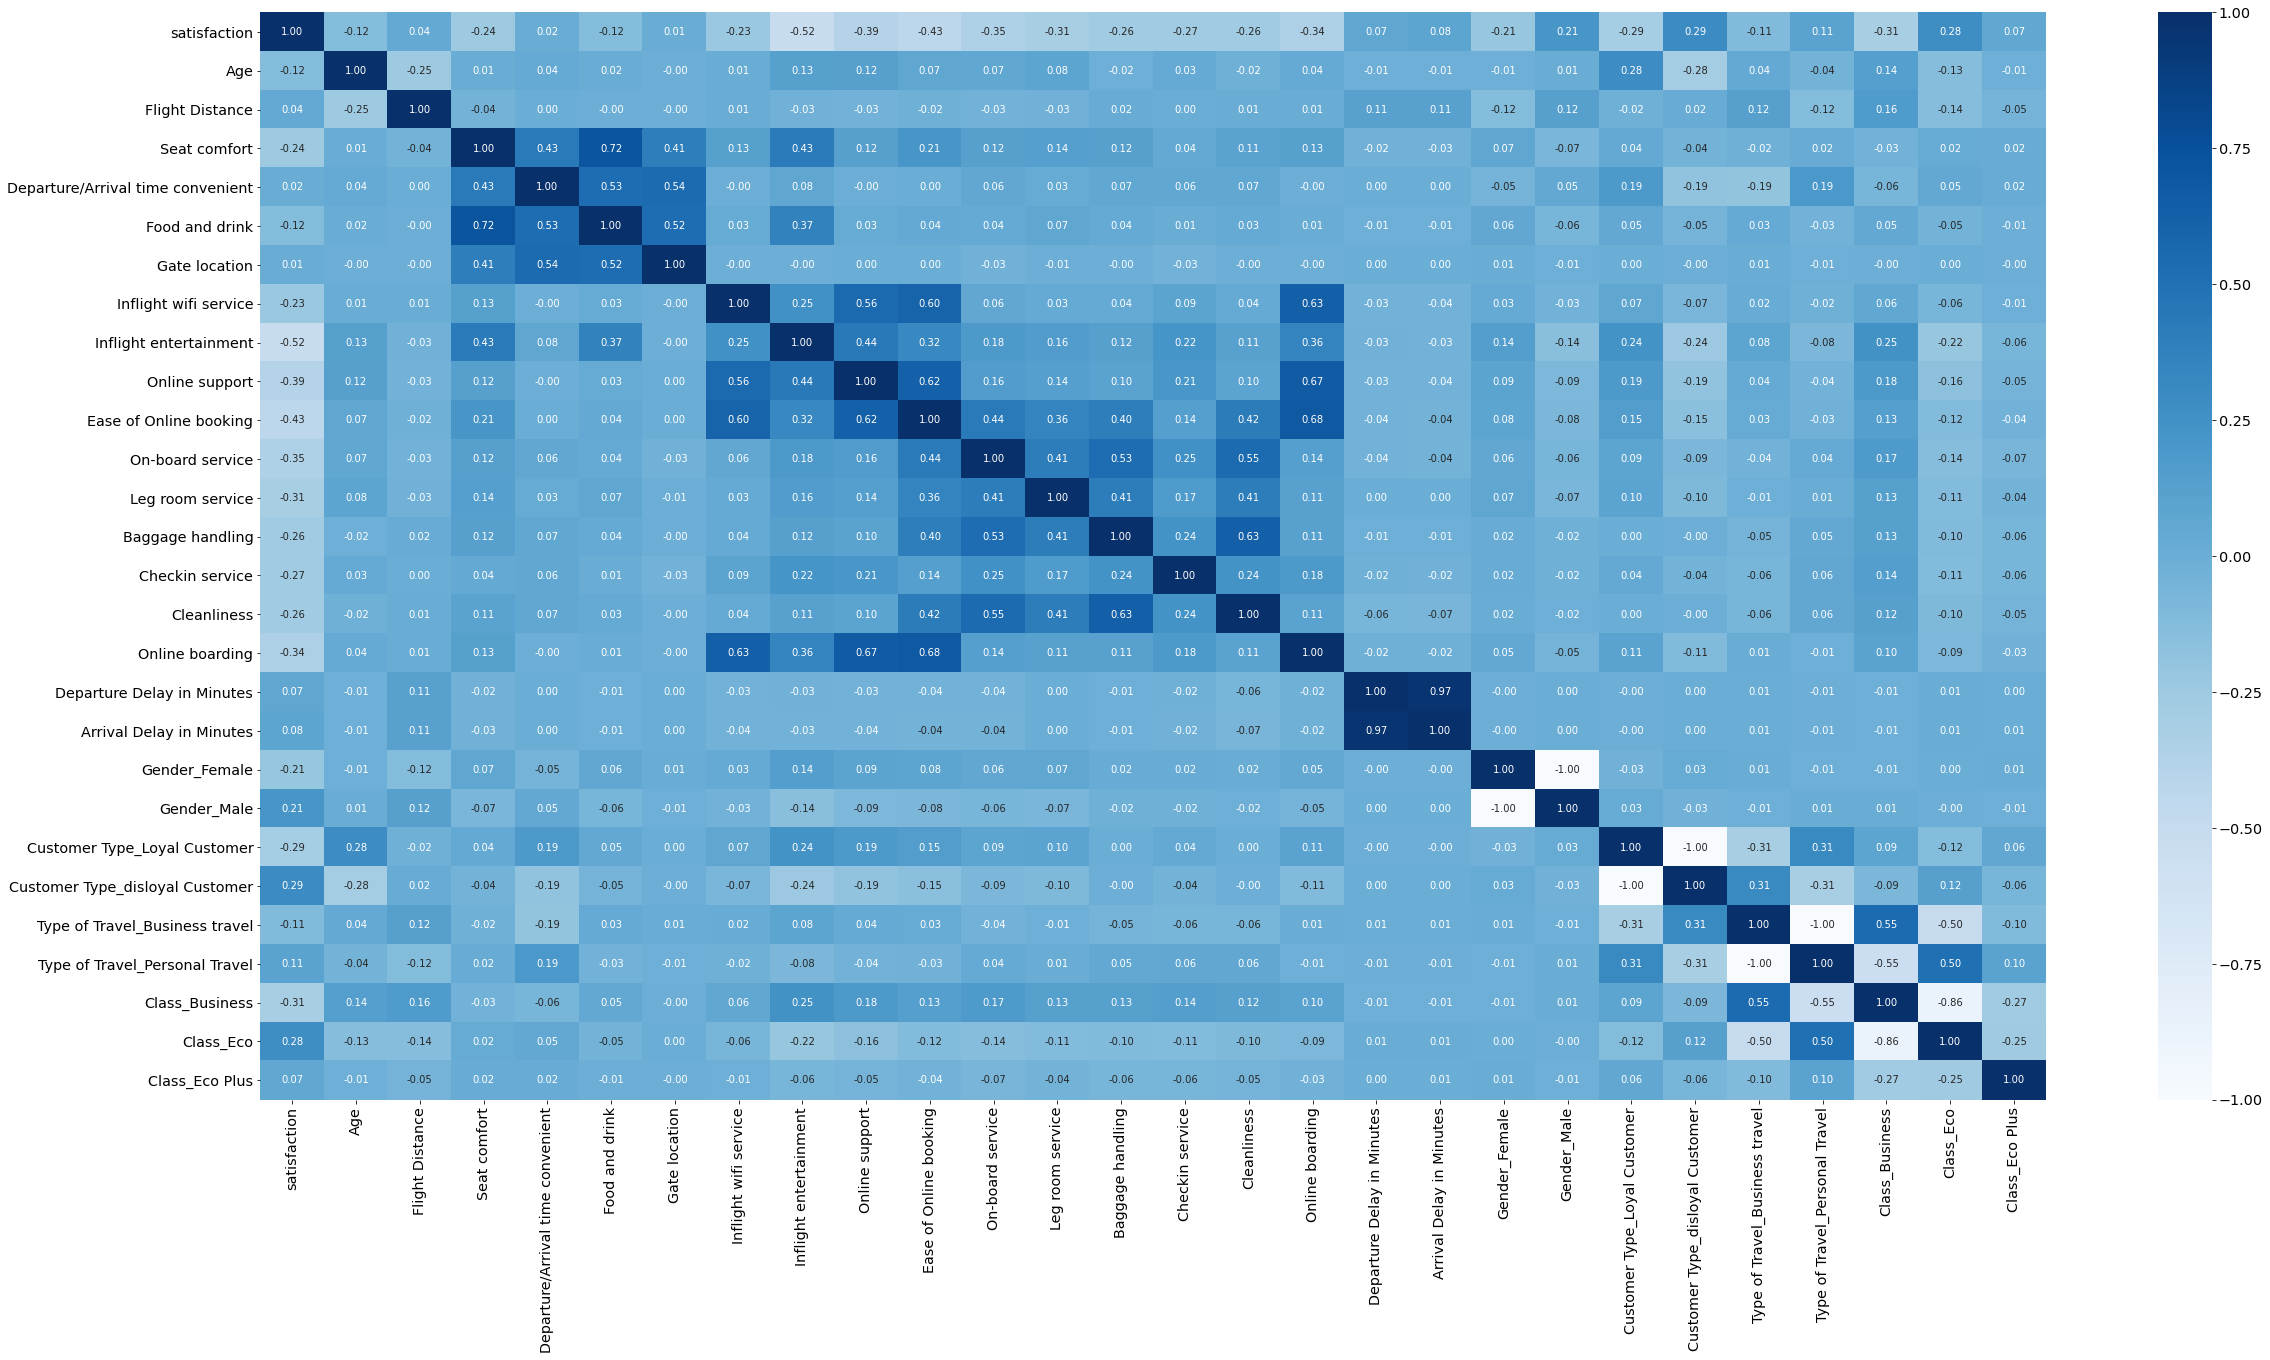

In [ ]:
plt.figure(figsize=(40, 20))
sns.heatmap(df.corr(), cmap='Blues',annot=True, fmt='.2f')

In [ ]:
df.columns

Index(['satisfaction', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'DepartureDelay_inMinutes_norm', 'ArrivalDelay_inMinutes_norm',
       'Age_std', 'FlightDistance_std', 'Gender_Female', 'Gender_Male',
       'Customer Type_Loyal Customer', 'Customer Type_disloyal Customer',
       'Type of Travel_Business travel', 'Type of Travel_Personal Travel',
       'Class_Business', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

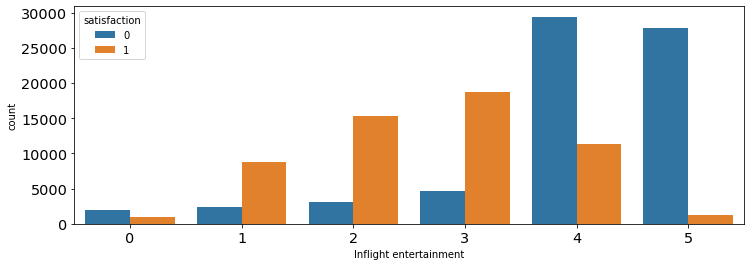

In [ ]:
sns.countplot(x='Inflight entertainment',hue='satisfaction',data=df)

In [ ]:
df.groupby('satisfaction')['Class_Business', 'Class_Eco', 'Class_Eco Plus'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Class_Business,Class_Eco,Class_Eco Plus
satisfaction,,,
0,69379,69379,69379
1,56421,56421,56421


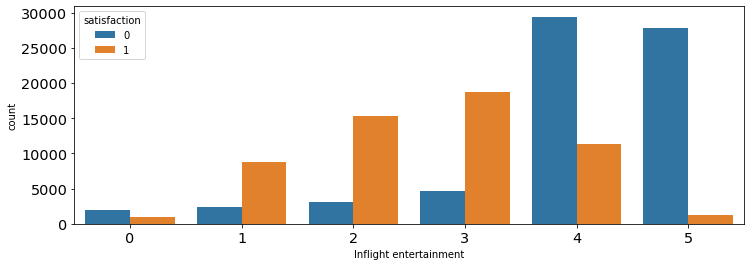

In [ ]:
sns.countplot(x='Inflight entertainment',hue='satisfaction',data=df)

**MODEL EVALUATION: CLASSIFICATION**

In [ ]:
df.head()

In [ ]:
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

**Menggunakan Algorithma Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain,ytrain)

#predict & evaluation
ypredict = lr.predict(Xtest)
eval_classification(lr, ypredict, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.82
Recall (Test Set): 0.82
F1-Score (Test Set): 0.82
AUC: 0.83


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print('train score',str(lr.score(Xtrain,ytrain)))
print('test score:',str(lr.score(Xtest,ytest)))

train score 0.7532477856007268
test score: 0.7506094329623741


**Menggunakan Algorithma Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(Xtrain,ytrain)

y_pred = model.predict(Xtest)
eval_classification(model, y_pred, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.94
Recall (Test Set): 0.93
F1-Score (Test Set): 0.93
AUC: 0.94


In [ ]:
print('Train score: ' + str(model.score(Xtrain, ytrain))) #accuracy
print('Test score:' + str(model.score(Xtest, ytest))) #accuracy

Train score: 1.0
Test score:0.9389399438824105


hyperparameter tuning untuk DT

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
model.fit(Xtrain, ytrain)

# Predict & Evaluation
y_pred = model.predict(Xtest)#Check performa dari model
eval_classification(model, y_pred, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.93
Recall (Test Set): 0.92
F1-Score (Test Set): 0.92
AUC: 0.93


In [ ]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 34
Best min_samples_split: 10
Best min_samples_leaf: 4
Best max_features: sqrt


In [ ]:
print('Train score: ' + str(model.score(Xtrain, ytrain)))
print('Test score:' + str(model.score(Xtest, ytest)))

Train score: 0.938119416101157
Test score:0.9166619422869777


**Menggunakan Algorithma Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(Xtrain,ytrain)

y_pred = rf.predict(Xtest)
eval_classification(rf, y_pred, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.95
Recall (Test Set): 0.96
F1-Score (Test Set): 0.95
AUC: 0.96


In [ ]:
print('Train score: ' + str(rf.score(Xtrain, ytrain))) #accuracy
print('Test score:' + str(rf.score(Xtest, ytest))) #accuracy

Train score: 1.0
Test score:0.9587175410704822


hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
 #List Hyperparameters yang akan diuji
hyperparameters = dict(
                        n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                        bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                        criterion = ['gini','entropy'],
                        max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                        min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                        min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                        max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                        n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                       )

 # Init
rf = RandomForestClassifier(random_state=42)
rf_model = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rf_model.fit(Xtrain,ytrain)

# Predict & Evaluation
ypred = rf_model.predict(Xtest)#Check performa dari model
eval_classification(rf_model, ypred, Xtrain, ytrain, Xtest, ytest)

KeyboardInterrupt: ignored

In [ ]:
print('Train score: ' + str(rf_model.score(Xtrain, ytrain)))
print('Test score:' + str(rf_model.score(Xtest, ytest)))

Train score: 0.9992910853988911
Test score:0.9550933585440794


Feature Importance

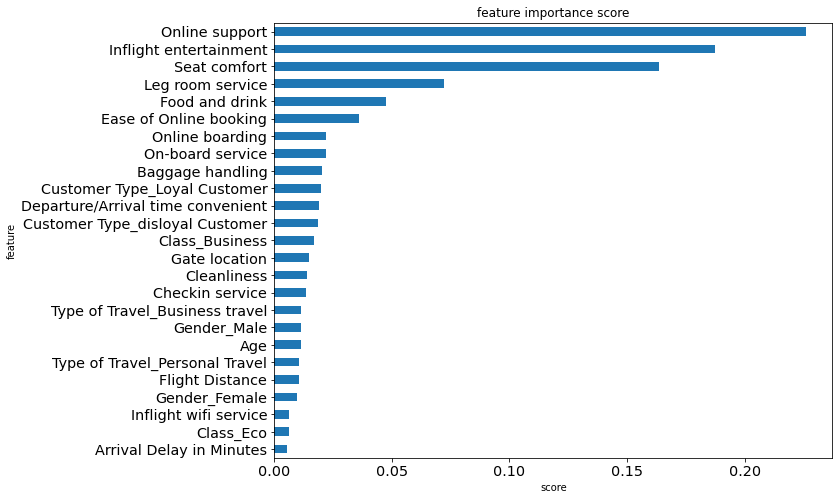

In [ ]:
# plt.figsize(8, 7)
feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

plt.savefig('feat_importances1.png')